In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns
from datetime import datetime, timedelta
plt.style.use("seaborn")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#\t
raw_data = pd.read_csv("/content/drive/MyDrive/Trabajo Final/GISAID/gisaid_hcov-19_2021_08_24_19_C.37.1.tsv",sep='\t')
raw_data.head()

,Accession ID,Collection date,Submission date,Location
0,EPI_ISL_1111127,2021-01-18,2021-03-01,South America / Peru / Callao
1,EPI_ISL_1111128,2021-01-18,2021-03-01,South America / Peru / Callao
2,EPI_ISL_1111130,2021-01-17,2021-03-01,South America / Peru / Callao
3,EPI_ISL_1111284,2021-01-18,2021-03-01,South America / Peru / Lima
4,EPI_ISL_1111285,2021-01-18,2021-03-01,South America / Peru / Lima


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Accession ID     409 non-null    object
 1   Collection date  409 non-null    object
 2   Submission date  409 non-null    object
 3   Location         409 non-null    object
dtypes: object(4)
memory usage: 12.9+ KB


In [ ]:
raw_data["Location"].value_counts()

South America / Peru / Lima                                            56
North America / Mexico / Queretaro                                     25
South America / Chile / Region Metropolitana de Santiago / Santiago    18
Europe / Spain / Madrid                                                15
North America / Canada / Quebec                                        12
                                                                       ..
South America / Peru / San Martin                                       1
South America / Chile / Antofagasta / Calama                            1
South America / Argentina / Santa Fe                                    1
Europe / Switzerland / Geneva                                           1
North America / USA / Wisconsin / Brown County                          1
Name: Location, Length: 156, dtype: int64

In [ ]:
location=raw_data['Location'].str.split(pat="/",n=2,expand=True)
location.columns=["Continent","Country","City"]
location["Continent"].value_counts()


South America     227
North America     124
Europe             57
Oceania             1
Name: Continent, dtype: int64

In [ ]:
raw_data=pd.concat([raw_data,location], axis=1)
raw_data.head()

,Accession ID,Collection date,Submission date,Location,Continent,Country,City
0,EPI_ISL_1111127,2021-01-18,2021-03-01,South America / Peru / Callao,South America,Peru,Callao
1,EPI_ISL_1111128,2021-01-18,2021-03-01,South America / Peru / Callao,South America,Peru,Callao
2,EPI_ISL_1111130,2021-01-17,2021-03-01,South America / Peru / Callao,South America,Peru,Callao
3,EPI_ISL_1111284,2021-01-18,2021-03-01,South America / Peru / Lima,South America,Peru,Lima
4,EPI_ISL_1111285,2021-01-18,2021-03-01,South America / Peru / Lima,South America,Peru,Lima


In [ ]:
raw_data.shape

(409, 7)

In [ ]:
raw_data['Continent'].value_counts()

South America     227
North America     124
Europe             57
Oceania             1
Name: Continent, dtype: int64

In [ ]:
# Separamos la data por un determinado pais. En este caso elegimos Peru y Chile 
# por presentar la mayor frecuencia de aparicion de aparicion de la variante C.37
raw_peru=raw_data[raw_data['Country']==raw_data.iloc[0,5]]
raw_chile=raw_data[raw_data['Country']==raw_data.iloc[404,5]]

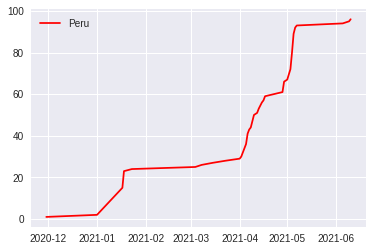

In [ ]:
# Hacemos el preprocesamiento para a la data de Peru para poder hacer el grafico
raw_peru['Collection date']=pd.to_datetime(raw_peru['Collection date'])
raw_peru=raw_peru.sort_values(by=['Collection date'])
xpe_values=raw_peru['Collection date'].unique()
ype_values=raw_peru['Collection date'].value_counts().sort_index()

# Con el objetivo de mostrar un grafico acumulativo de aparicion de la C.37. 
# Sumamos los casos previos hasta una determinada fecha. Por tanto en el grafico
# cada punto representa la totalidad de aparicion de la C.37 hasta la correspondiente fecha
j=0
for i in range(len(ype_values)-1):
   ype_values[j+1]=ype_values[i+1]+ype_values[i]
   j=j+1

# Realizamos el correspondiente plot.
pe=plt.plot_date(xpe_values,ype_values,"-r", label="Peru", linestyle="solid")
plt.legend(loc="upper left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


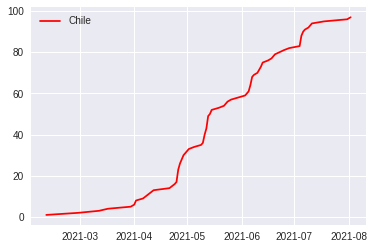

In [ ]:
# Hacemos el preprocesamiento para a la data de Chile para poder hacer el grafico
raw_chile['Collection date']=pd.to_datetime(raw_chile['Collection date'])
raw_chile=raw_chile.sort_values(by=['Collection date'])
xchi_values=raw_chile['Collection date'].unique()
ychi_values=raw_chile['Collection date'].value_counts().sort_index()

# Con el objetivo de mostrar un grafico acumulativo de aparicion de la C.37. 
# Sumamos los casos previos hasta una determinada fecha. Por tanto en el grafico
# cada punto representa la totalidad de aparicion de la C.37 hasta la correspondiente fecha
j=0
for i in range(len(ychi_values)-1):
   ychi_values[j+1]=ychi_values[i+1]+ychi_values[i]
   j=j+1
# Realizamos el correspondiente plot.
chi=plt.plot_date(xchi_values,ychi_values,"-r", label="Chile", linestyle="solid")
plt.legend(loc="upper left")

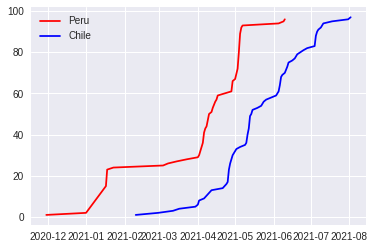

In [ ]:
# Data de Peru y Chile en un mismo grafico
fig, ax = plt.subplots()
ax.plot(xpe_values, ype_values,"-r", label="Peru")
ax.plot(xchi_values, ychi_values,"-b", label="Chile")
plt.legend(loc="upper left")
#plt.ylim(-1.5, 2.0)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


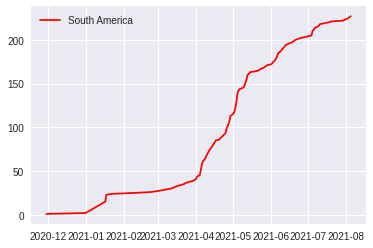

In [ ]:
# Hacemos el preprocesamiento para a la data de America del Sur para poder hacer el grafico
raw_south=raw_data[raw_data['Continent']==raw_data.iloc[0,4]]
raw_south['Collection date']=pd.to_datetime(raw_south['Collection date'])
raw_south=raw_south.sort_values(by=['Collection date'])
xsouth_values=raw_south['Collection date'].unique()
ysouth_values=raw_south['Collection date'].value_counts().sort_index()

j=0
for i in range(len(ysouth_values)-1):
   ysouth_values[j+1]=ysouth_values[i+1]+ysouth_values[i]
   j=j+1

plt.plot_date(xsouth_values,ysouth_values,"-r", label="South America", linestyle="solid")
plt.legend(loc="upper left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


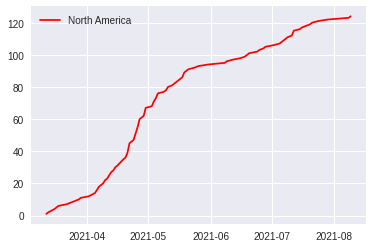

In [ ]:
# Hacemos el preprocesamiento para a la data de America del Norte para poder hacer el grafico
raw_north=raw_data[raw_data['Continent']==raw_data.iloc[308,4]]
raw_north['Collection date']=pd.to_datetime(raw_north['Collection date'])
raw_north=raw_north.sort_values(by=['Collection date'])
xnorth_values=raw_north['Collection date'].unique()
ynorth_values=raw_north['Collection date'].value_counts().sort_index()
j=0
for i in range(len(ynorth_values)-1):
   ynorth_values[j+1]=ynorth_values[i+1]+ynorth_values[i]
   j=j+1
ynorth_values
north=plt.plot_date(xnorth_values,ynorth_values,"-r", label="North America", linestyle="solid")
plt.legend(loc="upper left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


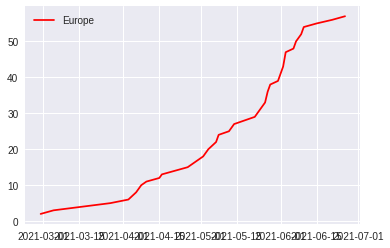

In [ ]:
#  Hacemos el preprocesamiento para a la data de Europa para poder hacer el grafico
raw_europe=raw_data[raw_data['Continent']==raw_data.iloc[98,4]]
raw_europe['Collection date']=pd.to_datetime(raw_europe['Collection date'])
raw_europe=raw_europe.sort_values(by=['Collection date'])
xeurope_values=raw_europe['Collection date'].unique()
yeurope_values=raw_europe['Collection date'].value_counts().sort_index()
j=0
for i in range(len(yeurope_values)-1):
   yeurope_values[j+1]=yeurope_values[i+1]+yeurope_values[i]
   j=j+1
yeurope_values
europe=plt.plot_date(xeurope_values,yeurope_values,"-r", label="Europe", linestyle="solid")
plt.legend(loc="upper left")

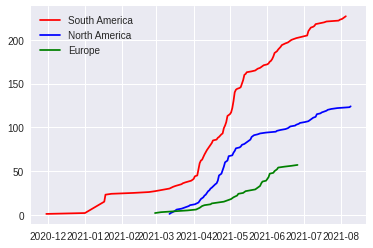

In [ ]:
# Data de data de America y Europa en un mismo grafico
fig, ax = plt.subplots()

ax.plot(xsouth_values, ysouth_values,"-r", label="South America")
ax.plot(xnorth_values, ynorth_values,"-b", label="North America")
ax.plot(xeurope_values,yeurope_values,"-g", label="Europe")
plt.legend(loc="upper left")
plt.show()